In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
connex = sqlite3.connect("weather_predict.db")  # Opens file if exists, else creates file
cur = connex.cursor()

In [3]:
query_city1 = 'kyoto_train_feats'
query1 = "SELECT * FROM " + query_city1

query_city2 = 'salvador_train_feats'
query2 = "SELECT * FROM " + query_city2

query_city3 = 'kauai_train_feats'
query3 = "SELECT * FROM " + query_city3

query_city4 = 'nice_train_feats'
query4 = "SELECT * FROM " + query_city4

query_city5 = 'manly_train_feats'
query5 = "SELECT * FROM " + query_city5

In [4]:
df1 = pd.read_sql(query1, con=connex).set_index('Date')
df2 = pd.read_sql(query2, con=connex).set_index('Date')
df3 = pd.read_sql(query3, con=connex).set_index('Date')
df4 = pd.read_sql(query4, con=connex).set_index('Date')
df5 = pd.read_sql(query5, con=connex).set_index('Date')

In [5]:
frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames)
df.Temp_max = df.Temp_max.astype(float)
df.Temp_min = df.Temp_min.astype(float)

In [6]:
#df.corr()[['Avg_temp']].sort_values('Avg_temp')  

In [40]:
df.columns

Index(['Avg_temp', 'Avg_dwp', 'Temp_max', 'Max_dwp', 'Temp_min', 'Min_dwp',
       'Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Temp_max_1', 'Temp_max_2',
       'Temp_max_3', 'Temp_min_1', 'Temp_min_2', 'Temp_min_3', 'Avg_dwp_1',
       'Avg_dwp_2', 'Avg_dwp_3', 'Max_dwp_1', 'Max_dwp_2', 'Max_dwp_3',
       'Min_dwp_1', 'Min_dwp_2', 'Min_dwp_3'],
      dtype='object')

In [8]:
# remove features that have very low Correlation values
# also remove max and min temperatures since we already 
# have the mean temperatures
predictors = ['Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3',
              'Temp_max_1','Temp_max_2', 'Temp_max_3',
              'Temp_min_1', 'Temp_min_2', 'Temp_min_3',
              'Avg_dwp_1', 'Avg_dwp_2', 'Avg_dwp_3', 
              'Max_dwp_1', 'Max_dwp_2','Max_dwp_3', 
              'Min_dwp_1', 'Min_dwp_2', 'Min_dwp_3']
              
#X = df[predictors]
y = df['Avg_temp']

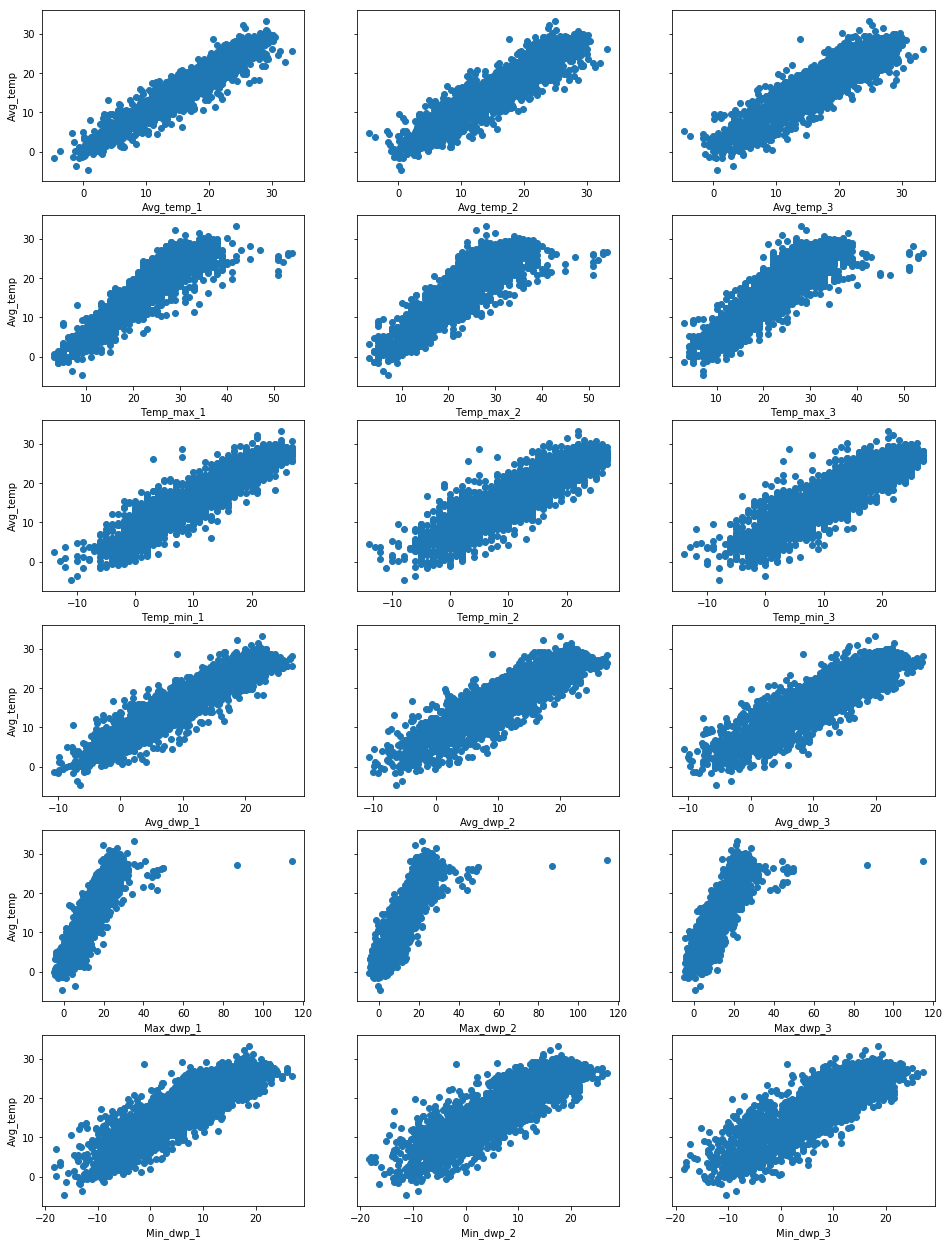

In [9]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df[feature], df['Avg_temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Avg_temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

In [10]:
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df[predictors]
y = df['Avg_temp']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

,const,Avg_temp_1,Avg_temp_2,Avg_temp_3,Temp_max_1
Date,,,,,
2017-01-04,1.0,6.375000,6.208333,5.625000,14.0
2017-01-05,1.0,7.083333,6.375000,6.208333,14.0
2017-01-06,1.0,6.250000,7.083333,6.375000,10.0
2017-01-07,1.0,3.541667,6.250000,7.083333,10.0
2017-01-08,1.0,5.416667,3.541667,6.250000,10.0


In [11]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3813.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6853.4
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3600   BIC:                         1.386e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7289      0.156      4.664      0.000       0.422       1.035
Avg_temp_1     0.9919      0.039     25.727      0.000       0.916       1.067
Avg_temp_2    -0.0572      0.043     -1.335      0.182      -0.141       0.027
Avg_temp_3     0.2023      0.040      5.058      0.000       0.124       0.281
Temp_max_1    -0.0749      0.018     -4.220      0.000      -0.110      -0.040
Temp_max_2     0.0207      0.018      1.144      0.253      -0.015       0.056
Temp_max_3    -0.0270      0.018     -1.533      0.125      -0.062       0.008
Temp_min_1    -0.2297      0.021    -11.084      0.000      -0.270      -0.189
Temp_min_2    -0.0079      0.022     -0.365      0.715      -0.050       0.035
Temp_min_3     0.0537      0.021      2.522      0.012       0.012       0.096
Avg_dwp_1      0.0329      0.029      1.129      0.259      -0.024       0.090
Avg_dwp_2     -0.0772      0.031     -2.474      0.013      -0.138      -0.016
Avg_dwp_3      0.0519      0.029      1.792      0.073      -0.005       0.109
Max_dwp_1     -0.0011      0.011     -0.097      0.923      -0.023       0.021
Max_dwp_2      0.0129      0.011      1.145      0.252      -0.009       0.035
Max_dwp_3      0.0089      0.011      0.792      0.428      -0.013       0.031
Min_dwp_1      0.1339      0.018      7.279      0.000       0.098       0.170
Min_dwp_2     -0.0039      0.019     -0.201      0.841      -0.042       0.034
Min_dwp_3     -0.0462      0.018     -2.510      0.012      -0.082      -0.010
==============================================================================
Omnibus:                      367.475   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2125.025
Skew:                          -0.299   Prob(JB):                         0.00
Kurtosis:                       6.706   Cond. No.                         477.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that meandewptm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('Max_dwp_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4038.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6853.4
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3601   BIC:                         1.385e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7280      0.156      4.667      0.000       0.422       1.034
Avg_temp_1     0.9929      0.037     26.752      0.000       0.920       1.066
Avg_temp_2    -0.0574      0.043     -1.342      0.180      -0.141       0.026
Avg_temp_3     0.2022      0.040      5.058      0.000       0.124       0.281
Temp_max_1    -0.0756      0.016     -4.731      0.000      -0.107      -0.044
Temp_max_2     0.0208      0.018      1.155      0.248      -0.015       0.056
Temp_max_3    -0.0269      0.018     -1.530      0.126      -0.061       0.008
Temp_min_1    -0.2299      0.021    -11.128      0.000      -0.270      -0.189
Temp_min_2    -0.0080      0.022     -0.367      0.713      -0.051       0.035
Temp_min_3     0.0537      0.021      2.523      0.012       0.012       0.096
Avg_dwp_1      0.0313      0.024      1.284      0.199      -0.017       0.079
Avg_dwp_2     -0.0769      0.031     -2.474      0.013      -0.138      -0.016
Avg_dwp_3      0.0521      0.029      1.799      0.072      -0.005       0.109
Max_dwp_2      0.0128      0.011      1.141      0.254      -0.009       0.035
Max_dwp_3      0.0088      0.011      0.788      0.431      -0.013       0.031
Min_dwp_1      0.1343      0.018      7.530      0.000       0.099       0.169
Min_dwp_2     -0.0039      0.019     -0.203      0.839      -0.042       0.034
Min_dwp_3     -0.0463      0.018     -2.516      0.012      -0.082      -0.010
==============================================================================
Omnibus:                      367.491   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2124.034
Skew:                          -0.299   Prob(JB):                         0.00
Kurtosis:                       6.705   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = X.drop('Min_dwp_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4291.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6853.4
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3602   BIC:                         1.385e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7291      0.156      4.677      0.000       0.423       1.035
Avg_temp_1     0.9925      0.037     26.789      0.000       0.920       1.065
Avg_temp_2    -0.0554      0.042     -1.332      0.183      -0.137       0.026
Avg_temp_3     0.2019      0.040      5.054      0.000       0.124       0.280
Temp_max_1    -0.0757      0.016     -4.741      0.000      -0.107      -0.044
Temp_max_2     0.0205      0.018      1.142      0.253      -0.015       0.056
Temp_max_3    -0.0268      0.018     -1.524      0.128      -0.061       0.008
Temp_min_1    -0.2295      0.021    -11.155      0.000      -0.270      -0.189
Temp_min_2    -0.0096      0.020     -0.480      0.632      -0.049       0.030
Temp_min_3     0.0541      0.021      2.545      0.011       0.012       0.096
Avg_dwp_1      0.0323      0.024      1.348      0.178      -0.015       0.079
Avg_dwp_2     -0.0809      0.024     -3.320      0.001      -0.129      -0.033
Avg_dwp_3      0.0532      0.028      1.871      0.061      -0.003       0.109
Max_dwp_2      0.0133      0.011      1.220      0.223      -0.008       0.035
Max_dwp_3      0.0087      0.011      0.779      0.436      -0.013       0.031
Min_dwp_1      0.1331      0.017      7.939      0.000       0.100       0.166
Min_dwp_3     -0.0475      0.017     -2.749      0.006      -0.081      -0.014
==============================================================================
Omnibus:                      367.246   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2122.659
Skew:                          -0.299   Prob(JB):                         0.00
Kurtosis:                       6.704   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X = X.drop('Temp_min_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4579.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6853.5
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3603   BIC:                         1.384e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7340      0.156      4.720      0.000       0.429       1.039
Avg_temp_1     0.9958      0.036     27.370      0.000       0.924       1.067
Avg_temp_2    -0.0677      0.033     -2.070      0.039      -0.132      -0.004
Avg_temp_3     0.2044      0.040      5.166      0.000       0.127       0.282
Temp_max_1    -0.0758      0.016     -4.747      0.000      -0.107      -0.044
Temp_max_2     0.0239      0.017      1.437      0.151      -0.009       0.056
Temp_max_3    -0.0274      0.018     -1.565      0.118      -0.062       0.007
Temp_min_1    -0.2318      0.020    -11.583      0.000      -0.271      -0.193
Temp_min_3     0.0517      0.021      2.502      0.012       0.011       0.092
Avg_dwp_1      0.0328      0.024      1.373      0.170      -0.014       0.080
Avg_dwp_2     -0.0832      0.024     -3.490      0.000      -0.130      -0.036
Avg_dwp_3      0.0544      0.028      1.920      0.055      -0.001       0.110
Max_dwp_2      0.0134      0.011      1.228      0.219      -0.008       0.035
Max_dwp_3      0.0086      0.011      0.771      0.441      -0.013       0.030
Min_dwp_1      0.1327      0.017      7.926      0.000       0.100       0.165
Min_dwp_3     -0.0479      0.017     -2.773      0.006      -0.082      -0.014
==============================================================================
Omnibus:                      367.835   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2133.903
Skew:                          -0.298   Prob(JB):                         0.00
Kurtosis:                       6.714   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = X.drop('Max_dwp_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4906.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6853.8
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3604   BIC:                         1.383e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7405      0.155      4.769      0.000       0.436       1.045
Avg_temp_1     0.9965      0.036     27.396      0.000       0.925       1.068
Avg_temp_2    -0.0656      0.033     -2.013      0.044      -0.130      -0.002
Avg_temp_3     0.1965      0.038      5.143      0.000       0.122       0.271
Temp_max_1    -0.0761      0.016     -4.769      0.000      -0.107      -0.045
Temp_max_2     0.0227      0.017      1.373      0.170      -0.010       0.055
Temp_max_3    -0.0216      0.016     -1.366      0.172      -0.053       0.009
Temp_min_1    -0.2318      0.020    -11.582      0.000      -0.271      -0.193
Temp_min_3     0.0530      0.021      2.575      0.010       0.013       0.093
Avg_dwp_1      0.0326      0.024      1.361      0.174      -0.014       0.079
Avg_dwp_2     -0.0855      0.024     -3.613      0.000      -0.132      -0.039
Avg_dwp_3      0.0667      0.023      2.847      0.004       0.021       0.113
Max_dwp_2      0.0143      0.011      1.322      0.186      -0.007       0.036
Min_dwp_1      0.1331      0.017      7.953      0.000       0.100       0.166
Min_dwp_3     -0.0511      0.017     -3.042      0.002      -0.084      -0.018
==============================================================================
Omnibus:                      369.344   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2146.738
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = X.drop('Max_dwp_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     5282.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6854.7
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3605   BIC:                         1.382e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7540      0.155      4.865      0.000       0.450       1.058
Avg_temp_1     0.9983      0.036     27.464      0.000       0.927       1.070
Avg_temp_2    -0.0776      0.031     -2.476      0.013      -0.139      -0.016
Avg_temp_3     0.1980      0.038      5.185      0.000       0.123       0.273
Temp_max_1    -0.0771      0.016     -4.833      0.000      -0.108      -0.046
Temp_max_2     0.0328      0.015      2.239      0.025       0.004       0.062
Temp_max_3    -0.0224      0.016     -1.416      0.157      -0.053       0.009
Temp_min_1    -0.2311      0.020    -11.551      0.000      -0.270      -0.192
Temp_min_3     0.0542      0.021      2.635      0.008       0.014       0.095
Avg_dwp_1      0.0314      0.024      1.312      0.190      -0.016       0.078
Avg_dwp_2     -0.0693      0.020     -3.422      0.001      -0.109      -0.030
Avg_dwp_3      0.0670      0.023      2.861      0.004       0.021       0.113
Min_dwp_1      0.1319      0.017      7.892      0.000       0.099       0.165
Min_dwp_3     -0.0530      0.017     -3.167      0.002      -0.086      -0.020
==============================================================================
Omnibus:                      369.918   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2152.558
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = X.drop('Avg_dwp_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     5721.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6855.6
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3606   BIC:                         1.382e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7458      0.155      4.816      0.000       0.442       1.049
Avg_temp_1     1.0132      0.035     29.333      0.000       0.945       1.081
Avg_temp_2    -0.0836      0.031     -2.699      0.007      -0.144      -0.023
Avg_temp_3     0.1985      0.038      5.197      0.000       0.124       0.273
Temp_max_1    -0.0772      0.016     -4.841      0.000      -0.108      -0.046
Temp_max_2     0.0337      0.015      2.302      0.021       0.005       0.062
Temp_max_3    -0.0229      0.016     -1.451      0.147      -0.054       0.008
Temp_min_1    -0.2324      0.020    -11.630      0.000      -0.272      -0.193
Temp_min_3     0.0528      0.021      2.567      0.010       0.012       0.093
Avg_dwp_2     -0.0592      0.019     -3.160      0.002      -0.096      -0.022
Avg_dwp_3      0.0713      0.023      3.077      0.002       0.026       0.117
Min_dwp_1      0.1466      0.012     11.811      0.000       0.122       0.171
Min_dwp_3     -0.0579      0.016     -3.551      0.000      -0.090      -0.026
==============================================================================
Omnibus:                      367.718   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2140.897
Skew:                          -0.296   Prob(JB):                         0.00
Kurtosis:                       6.721   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = X.drop('Temp_max_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_temp   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     6239.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:54   Log-Likelihood:                -6856.6
No. Observations:                3619   AIC:                         1.374e+04
Df Residuals:                    3607   BIC:                         1.381e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7325      0.155      4.738      0.000       0.429       1.036
Avg_temp_1     1.0218      0.034     30.033      0.000       0.955       1.089
Avg_temp_2    -0.0741      0.030     -2.447      0.014      -0.133      -0.015
Avg_temp_3     0.1581      0.026      6.047      0.000       0.107       0.209
Temp_max_1    -0.0818      0.016     -5.237      0.000      -0.112      -0.051
Temp_max_2     0.0284      0.014      2.003      0.045       0.001       0.056
Temp_min_1    -0.2359      0.020    -11.890      0.000      -0.275      -0.197
Temp_min_3     0.0656      0.019      3.537      0.000       0.029       0.102
Avg_dwp_2     -0.0606      0.019     -3.239      0.001      -0.097      -0.024
Avg_dwp_3      0.0716      0.023      3.091      0.002       0.026       0.117
Min_dwp_1      0.1467      0.012     11.820      0.000       0.122       0.171
Min_dwp_3     -0.0572      0.016     -3.509      0.000      -0.089      -0.025
==============================================================================
Omnibus:                      368.676   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2154.926
Skew:                          -0.296   Prob(JB):                         0.00
Kurtosis:                       6.734   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = X.drop('const', axis=1)

In [20]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.columns

Index(['Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Temp_max_1', 'Temp_max_2',
       'Temp_min_1', 'Temp_min_3', 'Avg_dwp_2', 'Avg_dwp_3', 'Min_dwp_1',
       'Min_dwp_3'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [23]:
from sklearn.externals import joblib
scaler_filename = "concat_scaler.save"
joblib.dump(X_scaler, scaler_filename)

['concat_scaler.save']

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# define the model
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [27]:
y_ridge_prediction = ridge.predict(X_test_scaled)

In [28]:
# traub the model/ fit the model to the traingin data
#ridge.fit(X_train_scaled, y_train)

# use evaluation metrics to determine model performance
#y_ridge_prediction = ridge.predict(X_test_scaled)

In [29]:
# use evaluation metrics to determine model performance
r2_ridge = r2_score(y_test, y_ridge_prediction)
print("The R^2 score for test data is:", r2_ridge)

The R^2 score for test data is: 0.9424265909816073


In [30]:
# save model
import pickle
with open('ridge_concat_feats.pkl', 'wb') as file:
    pickle.dump(ridge, file)

In [31]:
connex = sqlite3.connect("weather_predict.db") 
cur = connex.cursor() 
city = 'Kyoto'

query_city = city + '_recent_features'
query = "SELECT * FROM " + query_city

city_df = pd.read_sql(query, con=connex).set_index('Date')
#sorted_city = city_df.sort_values('Date',ascending=False)
clean_df = city_df.dropna()
predictors = ['Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Temp_max_1', 'Temp_max_2',
       'Temp_min_1', 'Temp_min_3', 'Avg_dwp_2', 'Avg_dwp_3', 'Min_dwp_1',
       'Min_dwp_3']

In [32]:
X_new = clean_df[predictors]
y_new= clean_df['Avg_temp']

In [33]:
X_new_scaled = X_scaler.transform(X_new)

In [34]:
y_new_prediction = ridge.predict(X_new_scaled)

In [35]:
r2_new = r2_score (y_new, y_new_prediction)
r2_new

-0.7060923212387795

In [36]:
from sklearn.linear_model import LinearRegression
# define the model
linear = LinearRegression()

# traub the model/ fit the model to the traingin data
linear.fit(X_train_scaled, y_train)

# predict
y_linear_prediction = linear.predict(X_test_scaled)

In [37]:
# use evaluation metrics to determine model performance
r2_linear = r2_score(y_test, y_linear_prediction)

print("The R^2 score for test data is:", r2_linear)

The R^2 score for test data is: 0.9498151068866777


In [38]:
#save model
import pickle
with open('linear_concat_feats.pkl', 'wb') as file:
    pickle.dump(linear, file)

In [39]:
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % linear.score(X_test_scaled, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, y_linear_prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, y_linear_prediction))

The Explained Variance: 0.95
The Mean Absolute Error: 1.08 degrees celsius
The Median Absolute Error: 0.69 degrees celsius
